<a href="https://colab.research.google.com/github/techonair/Machine-Learing-A-Z/blob/main/Natural%20Language%20Processing/Analyzing_the_Sentiments_of_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

Sentimental analysis of reviews collected by a restaurant

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Imorting the dataset

In [2]:
from google.colab import files
files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


{'Restaurant_Reviews.tsv': b'Review\tLiked\nWow... Loved this place.\t1\nCrust is not good.\t0\nNot tasty and the texture was just nasty.\t0\nStopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\nThe selection on the menu was great and so were the prices.\t1\nNow I am getting angry and I want my damn pho.\t0\nHoneslty it didn\'t taste THAT fresh.)\t0\nThe potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\nThe fries were great too.\t1\nA great touch.\t1\nService was very prompt.\t1\nWould not go back.\t0\nThe cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0\nI tried the Cape Cod ravoli, chicken, with cranberry...mmmm!\t1\nI was disgusted because I was pretty sure that was human hair.\t0\nI was shocked because no signs indicate cash only.\t0\nHighly recommended.\t1\nWaitress was a little slow in service.\t0\nThis place is not worth your time

For loading a tsv file we use delimiter '\t  and to remove quotes we have to use 3

In [5]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter= '\t', quoting = 3)

## Cleaning the text

In [14]:
import re
import nltk
# downloading stopwords
nltk.download('stopwords')
# importing stopwords
from nltk.corpus import stopwords
# {Love} (loving, loved) it refines different formats of a single word into the present form of the word, hence increases efficency and reduces space.
from nltk.stem.porter import PorterStemmer
# 
corpus = []

for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

Words like texture, taste, bank, holiday above don't contribute in analysis so we will remove them using max_feature

## Creating the Bag of Words model

Tokenization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500) 
# in order to find max_features need to first run this cell with  cv = CountVectorizer() and then print len(X[0]) 
# to see most frequent words, based on data we can round of for example 1566 to 1500
X = cv.fit_transform(corpus).toarray()
Y = dataset.iloc[:, -1].values

In [47]:
len(X[0])

1500

## Splitting the dataset into Train and Test Set

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes Model on training set

we can use different classification models but the accuracy in NLPs is better in Naive Bayes Model

In [49]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting the Test Results

In [50]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix

[[55 42]
 [12 91]]
0.73


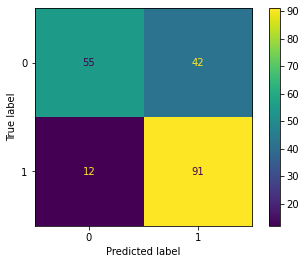

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
confusionMatrix = confusion_matrix(Y_test, y_pred)
dis = ConfusionMatrixDisplay(confusionMatrix, display_labels=classifier.classes_)
accuracy = accuracy_score(Y_test, y_pred)
print(confusionMatrix)
print(accuracy)

dis.plot()
plt.show()

## Predicting if a single review is positive or negative

### Positive review

Use our model to predict if the following review:

"I love this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [53]:
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


The review was correctly predicted as positive by our model.

### Negative review

Use our model to predict if the following review:

"I hate this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [54]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


The review was correctly predicted as negative by our model.